## *Jay Ren, Matthew Nguyen, Richard Gancayco:*
# **CMSC320 Final Project Checkpoint #2**
### **Dataset: UMD database of professors, courses, and grades from the PlanetTerp API** 


## Data Preprocessing and Method #1: 
### *All UMD Professors, the Average Grade they Give by Average PlanetTerp Rating they Receive*
The code below requests data from PlanetTerp API to create a csv file and dataframe of 3 columns: (undergraduate) professor name, their average rating (1-5 stars) on PlaneTerp, and the average grade (GPA) recieved from their students across all the courses that professor has taught. Then the data is plotted as a scatterplot where each point is a professor, plotting their student's average GPA by the professor's rating. Summary statisitics, correlation, and the regression line are also calculated. 

Please note that the list of undergraduate professor names was retrieved from the offcial UMD Academic Catalog of 3774 professor names, but only 2114 of those professors had data available on PlanetTerp.

In [5]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as colors
import math

In [38]:
# code that was initially necessary to create the "prof_gpa_rating_all.csv" file, but does not need to be run again
"""professor_names = pd.read_csv("umd_prof_names.csv")
professor_names["First_Name_MI"] = professor_names["First_Name_MI"].apply(lambda name: name.split()[0])
professor_names = professor_names["First_Name_MI"]+" "+professor_names["Last_Name"]"""
#display(professor_names)

'professor_names = pd.read_csv("umd_prof_names.csv")\nprofessor_names["First_Name_MI"] = professor_names["First_Name_MI"].apply(lambda name: name.split()[0])\nprofessor_names = professor_names["First_Name_MI"]+" "+professor_names["Last_Name"]'

In [39]:
# function to find the average grade a given professor gives to their students
def find_professors_course_gpa(course, name):
    # iterate through grade data given this course and find average student gpa, number students taught, and number of semesters taught
    # next line is a list of dictionaries, each dictionary is grades per semester per section, eg section 0101 fall 2024
    all_sections = requests.get(f"https://api.planetterp.com/v1/grades?course={course}&professor={name}").json() 
    section_grades = [] #list of averages tot be filled, each index is the average grade for section in a semester; later find the average of theses avertages lol
    
    for section in all_sections:
        num_grades = \
            section.get("A+")+section.get("A")+section.get("A-")+\
            section.get("B+")+section.get("B")+section.get("B-")+\
            section.get("C+")+section.get("C")+section.get("C-")+\
            section.get("D+")+section.get("D")+section.get("D-")+\
            section.get("F")+section.get("W")+section.get("Other")
            
        #find average grade for this section
        sum_grades = \
            4*section.get("A+")+ 4*section.get("A")+ 3.7*section.get("A-")\
            +3.3*section.get("B+")+3*section.get("B")+2.7*section.get("B-")\
            +2.4*section.get("C+")+2*section.get("C")+1.7*section.get("C-")
          
        section_avg = sum_grades/num_grades
        if not math.isnan(section_avg):
            section_grades.append(section_avg) 
    if not section_grades: #if empty
        return np.nan
    else:
        return np.average(section_grades)
        

In [40]:
#RUNNING THIS CODE BLOCK HAS ALREADY BEEN RUN ONCE TO CREATE A CSV FILE
#IT SHOULD NOT BE RUN AGAIN!!!
#IT TOOK 1 HOUR AND 45 MINUTES TO RUN, YES RUN, THIS CODE BECAUSE IT SENDS LIKE 18,000 GET REQUESTS TO THE API
# the average professor rating had already been calculated by the PlanetTerp people, 
# but I had to manually code to calculate the average GPAs of each professor's students here
# the file "prof_rating_gpa_all.csv" is the final product of this code, no to bombard the API like I did to generate another file
"""
rows = []
df = pd.DataFrame(rows)

# "save the work" to a subset csv file every 200 iterations; later aggrgeate them into one
count = 1
last = 0
for name in professor_names:

    res = requests.get(f"https://api.planetterp.com/v1/professor?name={name}").json()
    if not "error" in res.keys():        
        avg_rating = res.get("average_rating")
        if not avg_rating is None: #skip if no ratings/reviews at all
            if res.get("courses"): #if not empty
                course_gpas = []
                courses_no_duplicates =list(set(res.get("courses")))
                for course in courses_no_duplicates:
                    try:
                        course_gpa = find_professors_course_gpa(course, name)
                    except:
                        course_gpa = np.nan
                    #print(f"{course}, {course_gpa}")
                    if not math.isnan(course_gpa):
                        course_gpas.append(course_gpa)
                avg_student_gpa = round(np.average(course_gpas),2)
                rows.append({'name':name,'rating':avg_rating,'students_gpa':avg_student_gpa})
    if count%200 == 0:
        csv_title= 'prof_rating_gpa_'+str(last)+'-'+str(count-1)+'.csv'
        print("...creating "+csv_title)
        df = pd.DataFrame(rows)
        df.to_csv(csv_title, index=False)
        rows = []
        last += 200
    count += 1

csv_title= 'prof_rating_gpa_'+str(last)+'-'+str(count-1)+'.csv'
print("...creating "+csv_title)
df = pd.DataFrame(rows)
df.to_csv(csv_title, index=False)"""

'\nrows = []\ndf = pd.DataFrame(rows)\n\n# "save the work" to a subset csv file every 200 iterations; later aggrgeate them into one\ncount = 1\nlast = 0\nfor name in professor_names:\n\n    res = requests.get(f"https://api.planetterp.com/v1/professor?name={name}").json()\n    if not "error" in res.keys():        \n        avg_rating = res.get("average_rating")\n        if not avg_rating is None: #skip if no ratings/reviews at all\n            if res.get("courses"): #if not empty\n                course_gpas = []\n                courses_no_duplicates =list(set(res.get("courses")))\n                for course in courses_no_duplicates:\n                    try:\n                        course_gpa = find_professors_course_gpa(course, name)\n                    except:\n                        course_gpa = np.nan\n                    #print(f"{course}, {course_gpa}")\n                    if not math.isnan(course_gpa):\n                        course_gpas.append(course_gpa)\n               

In [41]:
#more code that only needed to be run once before to create csv, but should not be run again
"""#combine all those csv files into one dataframe
df_combined = pd.DataFrame([])
count = 0
while count<=3600:
    csv_name = "prof_rating_gpa_"+str(count)+"-"+str(count+(199 if count < 3600 else 174))+".csv"
    to_concat = pd.read_csv(csv_name)
    df_combined = pd.concat([df_combined, to_concat])
    count += 200
df_combined = df_combined.dropna() #drop all na values

#also convert that aggregated dataframe into a csv for future usage
df_combined.to_csv("prof_rating_gpa_all.csv", index=False)
display(df_combined)"""

df_combined = pd.read_csv("prof_rating_gpa_all.csv")
display(df_combined)

,name,rating,students_gpa
0,Daniel Abadi,3.0750,3.04
1,Hossein Abbasi,3.7195,3.02
2,Jamaal Abdul-Alim,3.6667,2.84
3,Eyad Abed,4.3333,2.78
4,Katharine Abraham,5.0000,2.38
...,...,...,...
2109,Barbara Zocal Da Silva,5.0000,3.00
2110,Linda Zou,4.6667,3.47
2111,Sarah Zsak,3.6667,3.32
2112,Emanuel Zur,4.7500,2.41


## Method #1 Plot and Summary Statistics

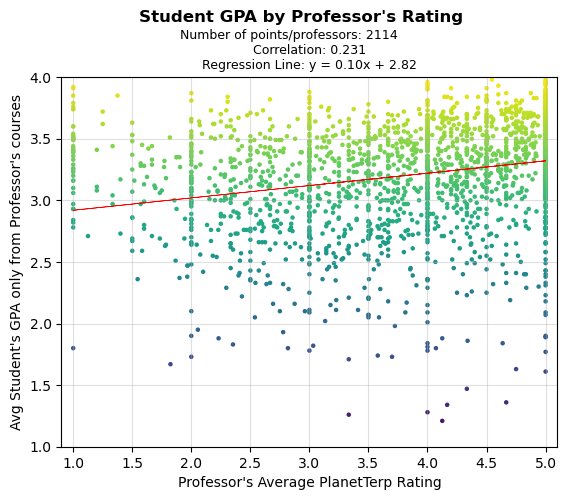

        rating students_gpa
count  2114.00      2114.00
mean      3.84         3.20
std       1.05         0.46
min       1.00         0.00
25%       3.08         2.98
50%       4.00         3.29
75%       4.80         3.52
max       5.00         3.98


In [22]:
#now plot the data-- each point is a professor, plot the average grade they give out by their planet terp rating and perform analyses 
x_vals = df_combined['rating']
y_vals = df_combined['students_gpa']

#find correlation coefficient
coerr, p = stats.pearsonr(x_vals,y_vals)

plt.scatter(x_vals, y_vals,s=5,c=y_vals.apply(lambda x: x), cmap='viridis',norm=colors.Normalize(vmin=1, vmax=4))

#find regression line
slope, intercept = np.polyfit(x_vals, y_vals, 1)
regression_line = slope * x_vals + intercept
plt.plot(x_vals, regression_line, linewidth=.5, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')

plt.suptitle('Student GPA by Professor\'s Rating', fontsize=12, fontweight="bold", y=1.02)
plt.title('Number of points/professors: '+str(len(df_combined))+'\
          \nCorrelation: '+str(round(coerr,3))+f'\nRegression Line: y = {slope:.2f}x + {intercept:.2f}', fontsize=9)    
plt.xlabel('Professor\'s Average PlanetTerp Rating', fontsize=10)
plt.ylabel('Avg Student\'s GPA only from Professor\'s courses', fontsize= 10)
plt.ylim(1, 4)
plt.xlim(.9, 5.1)
plt.grid(True, alpha = 0.4)

plt.show()
print(df_combined.describe().map('{:.2f}'.format))



## Conclusions from Method 1 
The correlation coefficient of 0.231 weakly suggests that as a UMD professor's planet terp increases, so does their student's grades-- perhaps better rated professors have higher performing students, as expected.

Similarly, the linear regression line, given a new professor with a certain average PlanetTerp rating, predicts that that professor's students will recieve an average gpa of approximately 0.10*rating+2.82.

The ratings have higher variance than GPA, perhaps because the number of ratings is often much lower than number of grades. For example, a professor may only have a single review of 1-star, but taught 1000 students; and the sample variance is negatively proportional to n, if the formula is recalled.

If we define "outlier" to a be a point more than 3 standard deviations from the mean, then all points below 1.82 (1.82=3.2-3*.46) are outliers. As we know, mean is more affected by outliers than median, and this effect is evident since the gpa median 3.29 but the mean is slightly pulled down by outliers to be 3.20.

Also, one may observe that many professor ratings adhere to the integer values of 1-5. This is probably because these professors only had one single review, and single reviews can only have integer values (number of stars). The second method accounts for these points where the rating is unreliable due to only 1-or-few existing by increasing point sized based on numebr of ratings.

## Data Preprocessing and Method #2:
### *UMD Professors per Variable Course: the Average Grade they Give by Average PlanetTerp Rating they Receive*
The code below is a tool, more so than a single plot, that, given any UMD course, plots the all of the professors who have taught that course as points on a scatterplot, with the x-axis as their average PlanetTerp rating (1-5 stars) and the y-axis as the average gpa of all students who have taken the professor for that course. Additionally, the point size corresponds to the number of reviews that professor has on PlanetTerp. Professors with more reviews may have ratings that more accurately reflect their true performance.It queries the PlanetTerp APi to find this data. 

The code also generates a corresponding table for the chosen course. Each row uniquely is the data for one professor who has taught that course. Columns include: Professor's name, average rating per course, number of ratings for the given course, average gpa of students who took that course with that professor, total number of students that professor has taught for that course (precisely, the number of grades handed out; some students may have taken the class more than once), and total number of semesters the professor has taught for that course.  

Several plots of subjectively chosen courses are shown demonstrating this tool, and inferences can be made from each.  


Table of Professors Data for CMSC320, Introduction to Data Science


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Elias Gonzalez,5.00,1.0,3.52,100,1
1,Jose Calderon,4.67,6.0,3.48,620,2
2,Fardina Alam,4.59,22.0,3.81,248,1
3,John Dickerson,3.73,15.0,3.36,1603,7
4,Hector Corrada Bravo,3.00,3.0,3.20,848,5
5,Maksym Morawski,2.80,87.0,3.35,772,3
6,Mohammad Nayeem Teli,2.68,22.0,3.10,678,4


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count       7.00        7.00    7.00                7.00                 7.00
mean        3.78       22.29    3.40              695.57                 3.29
std         0.98       29.81    0.23              485.38                 2.21
min         2.68        1.00    3.10              100.00                 1.00
25%         2.90        4.50    3.28              434.00                 1.50
50%         3.73       15.00    3.36              678.00                 3.00
75%         4.63       22.00    3.50              810.00                 4.50
max         5.00       87.00    3.81             1603.00                 7.00


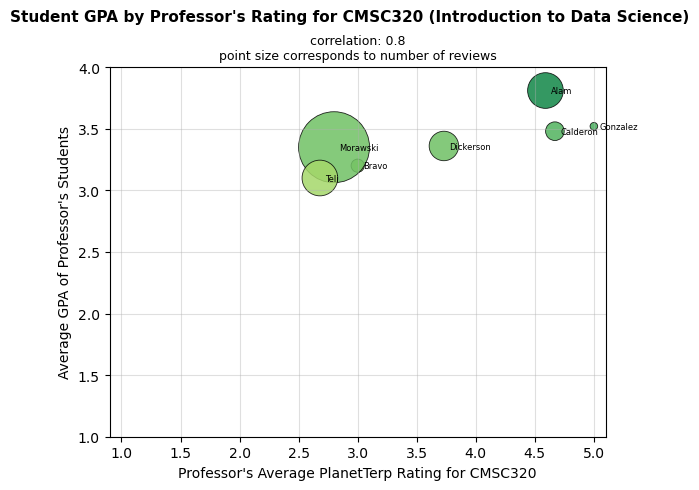


Table of Professors Data for CMSC132, Object-Oriented Programming II


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Nelson Padua-Perez,4.10,42.0,2.62,2495,11
1,Elias Gonzalez,3.94,35.0,3.34,332,2
2,Fawzi Emad,3.93,92.0,2.37,3676,9
3,Pedram Sadeghian,3.44,43.0,2.60,2202,9
4,Larry Herman,3.33,129.0,2.34,3993,13
5,Ilchul Yoon,2.82,11.0,2.36,210,1


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count       6.00        6.00    6.00                6.00                 6.00
mean        3.59       58.67    2.60             2151.33                 7.50
std         0.49       43.39    0.38             1607.22                 4.89
min         2.82       11.00    2.34              210.00                 1.00
25%         3.36       36.75    2.36              799.50                 3.75
50%         3.69       42.50    2.49             2348.50                 9.00
75%         3.94       79.75    2.62             3380.75                10.50
max         4.10      129.00    3.34             3993.00                13.00


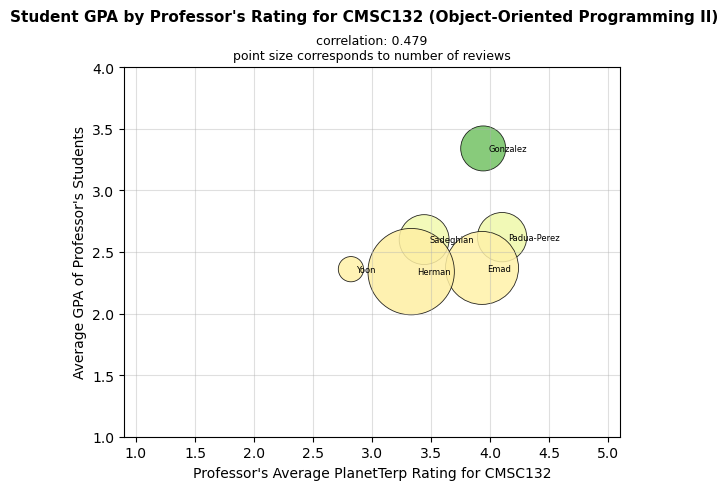


Table of Professors Data for CMSC216, Introduction to Computer Systems


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Jose Calderon,4.79,14.0,2.57,595,1
1,Christopher Kauffman,4.78,63.0,3.00,502,1
2,Nelson Padua-Perez,4.40,50.0,2.51,2863,10
3,Pedram Sadeghian,4.00,2.0,2.57,234,2
4,Herve Franceschi,3.90,10.0,2.29,38,1
5,Alan Sussman,3.60,5.0,2.13,277,3
6,Neil Spring,3.33,3.0,1.79,163,2
7,Larry Herman,3.24,147.0,2.32,5508,12
8,A.U. Shankar,2.16,19.0,1.71,934,7
9,Ilchul Yoon,2.06,86.0,1.65,845,4


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count      10.00       10.00   10.00               10.00                10.00
mean        3.63       39.90    2.25             1195.90                 4.30
std         0.96       47.43    0.44             1718.69                 4.00
min         2.06        2.00    1.65               38.00                 1.00
25%         3.26        6.25    1.88              244.75                 1.25
50%         3.75       16.50    2.30              548.50                 2.50
75%         4.30       59.75    2.55              911.75                 6.25
max         4.79      147.00    3.00             5508.00                12.00


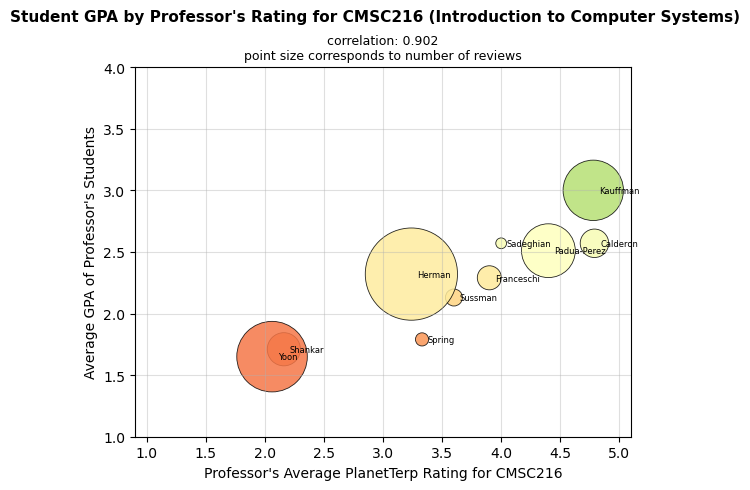


Table of Professors Data for CMSC451, Design and Analysis of Computer Algorithms


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,David Mount,5.00,1.0,2.88,205,3
1,Laxman Dhulipala,4.69,16.0,3.08,188,2
2,Andrew Childs,4.62,32.0,2.77,1040,8
3,Aravind Srinivasan,4.00,3.0,2.41,385,5
4,Jonathan Katz,3.33,6.0,2.67,257,2
5,Clyde Kruskal,3.31,16.0,2.04,345,5


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count       6.00        6.00    6.00                6.00                 6.00
mean        4.16       12.33    2.64              403.33                 4.17
std         0.73       11.57    0.37              321.31                 2.32
min         3.31        1.00    2.04              188.00                 2.00
25%         3.50        3.75    2.48              218.00                 2.25
50%         4.31       11.00    2.72              301.00                 4.00
75%         4.67       16.00    2.85              375.00                 5.00
max         5.00       32.00    3.08             1040.00                 8.00


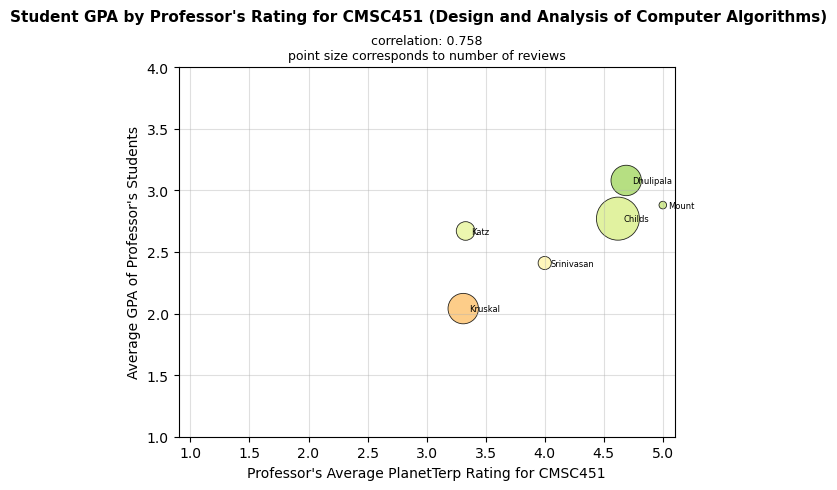


Table of Professors Data for CMSC420, Advanced Data Structures


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Venkatramanan Subrahmanian,5.00,2.0,3.10,195,3
1,David Mount,4.87,30.0,2.92,791,5
2,Michael Marsh,4.65,26.0,2.80,1086,6
3,Jason Filippou,4.25,4.0,2.92,728,4
4,Justin Wyss-Gallifent,4.19,37.0,3.31,972,4
5,Aravind Srinivasan,3.50,2.0,3.20,154,1
6,Roger Eastman,3.00,2.0,3.07,291,2
7,Michelle Hugue,2.79,14.0,2.74,1647,16
8,Hanan Samet,1.79,14.0,2.11,333,9
9,Larry Davis,1.00,1.0,2.88,243,4


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count      10.00       10.00   10.00               10.00                10.00
mean        3.50       13.20    2.90              644.00                 5.40
std         1.35       13.43    0.33              490.06                 4.33
min         1.00        1.00    2.11              154.00                 1.00
25%         2.84        2.00    2.82              255.00                 3.25
50%         3.85        9.00    2.92              530.50                 4.00
75%         4.55       23.00    3.09              926.75                 5.75
max         5.00       37.00    3.31             1647.00                16.00


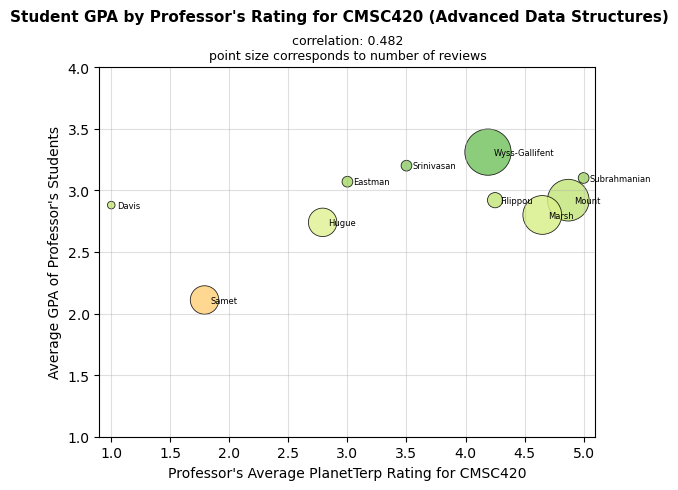


Table of Professors Data for CHEM131, Chemistry I - Fundamentals of General Chemistry


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Christopher Jarzynski,5.00,1.0,2.33,280,2
1,Samuel Lascio,5.00,3.0,2.28,140,1
2,Elizabeth Griffith,4.60,5.0,2.52,487,3
3,Natalia White,4.50,2.0,2.26,54,2
4,Michael Pacella,4.33,3.0,2.54,220,1
5,Monique Koppel,4.25,4.0,2.38,445,2
6,Amanda Schech,4.17,46.0,2.26,2027,13
7,Frederick Khachik,4.00,1.0,2.61,366,2
8,Bryan Eichhorn,3.96,24.0,2.00,1051,4
9,Lenea Stocker,3.71,31.0,2.34,1733,7


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count      21.00       21.00   21.00               21.00                21.00
mean        3.52       18.86    2.31              731.62                 3.67
std         1.01       20.01    0.18              649.80                 3.26
min         1.35        1.00    2.00               54.00                 1.00
25%         2.88        4.00    2.22              280.00                 2.00
50%         3.60       13.00    2.28              487.00                 2.00
75%         4.25       26.00    2.43             1041.00                 4.00
max         5.00       67.00    2.61             2357.00                13.00


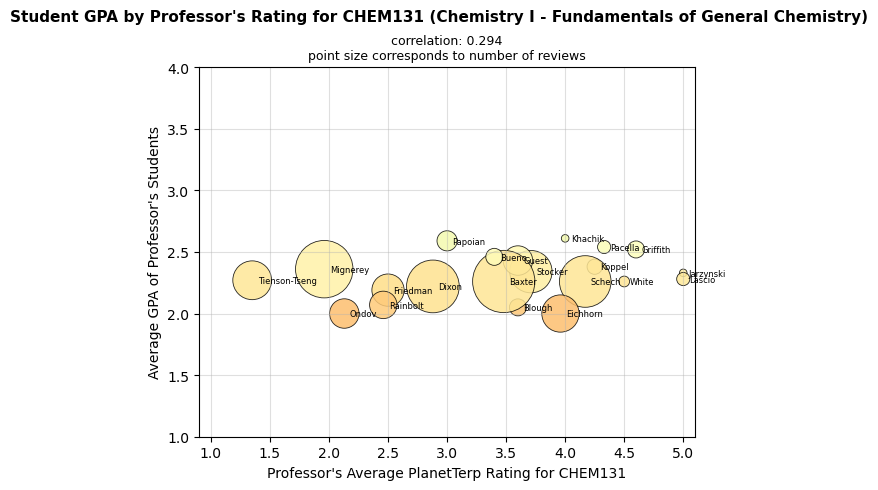


Table of Professors Data for PSYC100, Introduction to Psychology


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Dirk Parham,5.00,18.0,3.56,652,10
1,Joseph Barnet,4.86,14.0,3.38,216,2
2,Abigail Nicolas,4.60,25.0,3.68,935,4
3,Heather Ganginis DelPino,4.43,7.0,3.37,224,3
4,Benjamin Jones,4.10,31.0,3.07,2799,10
5,Ryan Curtis,3.75,8.0,2.54,5777,14
6,Scott Roberts,3.75,4.0,2.74,783,9
7,Rachel Vandaalen,3.71,14.0,3.25,446,3
8,Dylan Selterman,3.30,10.0,2.65,4142,13


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count       9.00        9.00    9.00                9.00                 9.00
mean        4.17       14.56    3.14             1774.89                 7.56
std         0.59        8.83    0.41             2006.88                 4.61
min         3.30        4.00    2.54              216.00                 2.00
25%         3.75        8.00    2.74              446.00                 3.00
50%         4.10       14.00    3.25              783.00                 9.00
75%         4.60       18.00    3.38             2799.00                10.00
max         5.00       31.00    3.68             5777.00                14.00


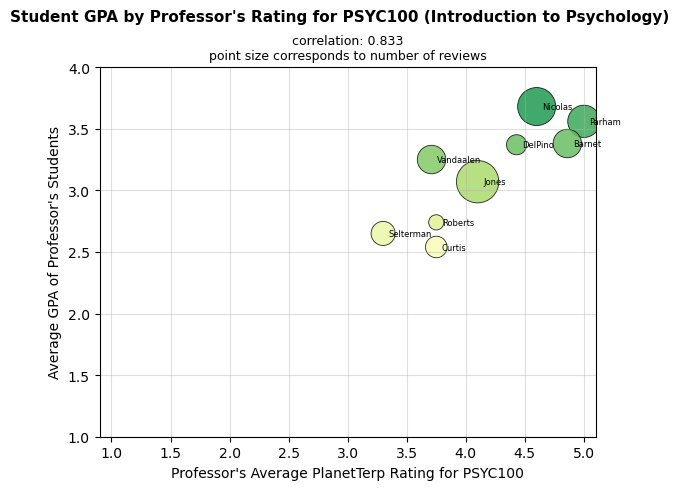


Table of Professors Data for MATH141, Calculus II


,Professor Name,Avg Rating,Num Ratings,Avg GPA,Num Students Taught,Num Semesters Taught
0,Archana Khurana,5.00,1.0,2.36,531,3
1,Maxx Cho,5.00,1.0,2.04,59,2
2,Jason Schultz,5.00,2.0,2.94,26,1
3,Bo Tian,5.00,1.0,2.60,21,1
4,Brandon Johnson,5.00,2.0,3.45,23,1
5,Bradford Sanders,5.00,4.0,2.23,1502,8
6,Brandon Alexander,4.75,4.0,2.63,42,1
7,James Conway,4.68,22.0,2.41,342,2
8,Steven Chadwick,4.59,17.0,2.47,1794,9
9,Martin Molina Fructuoso,4.50,2.0,3.16,23,1


      Avg Rating Num Ratings Avg GPA Num Students Taught Num Semesters Taught
count      38.00       38.00   38.00               38.00                38.00
mean        3.62       10.53    2.33              419.76                 2.82
std         1.15       10.81    0.51              489.71                 2.56
min         1.00        1.00    1.40               19.00                 1.00
25%         2.87        2.00    2.00               66.00                 1.00
50%         3.79        5.00    2.29              205.00                 1.50
75%         4.50       16.25    2.71              588.00                 4.00
max         5.00       43.00    3.45             1894.00                10.00


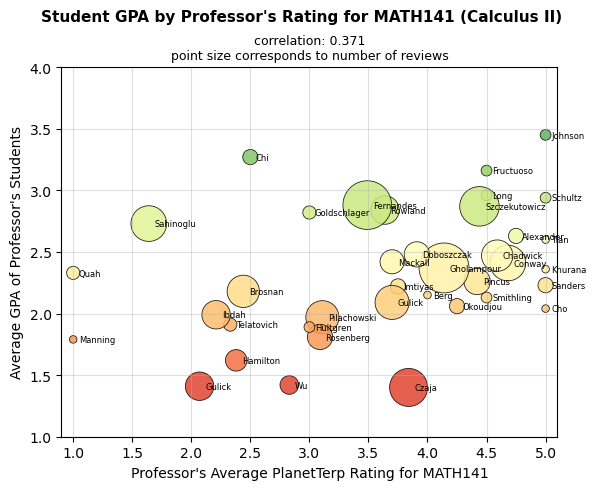

In [26]:
"""import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as colors"""

def create_and_display_table_and_plot(course):
    # given a course, each row is uniquely a professor of that course
    # columns are:
    #   professor's name
    #   avg rating for that particular course (what if no rating?)
    #   avg gpa for that particular course and professor
    #   total number of reviews/ratings for that particular course and professor
    #   total number of students (number grades given out, potentially students retake course) the professor has taught for this course 
    #   total number of semesters of this course the professor has taught

    #get list of professors from given course
    res_json = requests.get(f"https://api.planetterp.com/v1/course?name={course}").json()
    title = res_json["title"]
    professor_names = list(set(res_json["professors"]))

    #columns
    avg_rating_per_course = []
    num_ratings_per_course = []
    avg_gpa_per_course = []
    total_students_taught_list = []
    total_semesters_taught_list = []

    # find data per professor
    for name in professor_names:
        # find avg rating for each professor
        num = 0
        sum_ratings = 0

        #iterate through professor rating data for this course to find average rating and number of ratings
        professor_reviews= requests.get(f"https://api.planetterp.com/v1/professor?name={name}&reviews=true").json()["reviews"] # a list of dictionaries
        for review in professor_reviews:
            if review.get("course") == course:
                sum_ratings += review.get("rating")
                num += 1
        if num > 0: 
            avg_rating_per_course.append(round(sum_ratings/num,2))
            num_ratings_per_course.append(int(num))
        else: #if there was no ratings at all for the professor in this course
            avg_rating_per_course.append(np.nan)
            num_ratings_per_course.append(np.nan)

        # iterate through grade data given this course and find average student gpa, number students taught, and number of semesters taught
        # next line is a list of dictionaries, each dictionary is grades per semester per section, eg section 0101 fall 2024
        grades_per_course_per_prof_all_time = requests.get(f"https://api.planetterp.com/v1/grades?course={course}&professor={name}").json() 
        section_grades = [] #list of averages tot be filled, each index is the average grade for section in a semester; later find the average of theses avertages lol
        total_students_taught = 0
        total_semesters_taught = set()
        for section in grades_per_course_per_prof_all_time:
            #find total number of "students" (really grades) of this section
            num_grades = \
                section.get("A+")+section.get("A")+section.get("A-")+\
                section.get("B+")+section.get("B")+section.get("B-")+\
                section.get("C+")+section.get("C")+section.get("C-")+\
                section.get("D+")+section.get("D")+section.get("D-")+\
                section.get("F")+section.get("W")+section.get("Other")
            total_students_taught += num_grades #add to total
            
            #find average grade for this section
            sum_grades = \
                4*section.get("A+")+ 4*section.get("A")+ 3.7*section.get("A-")\
                +3.3*section.get("B+")+3*section.get("B")+2.7*section.get("B-")\
                +2.4*section.get("C+")+2*section.get("C")+1.7*section.get("C-")        
            section_grades.append(sum_grades/num_grades) #add to a list of averages 
            
            #add to total number of unique semesters taught
            total_semesters_taught.add(section.get("semester"))

        if not section_grades:
            avg_gpa_per_course.append(np.nan)
        else:
            avg_gpa_per_course.append(round(np.average(section_grades),2)) # average the averages; eg avg_gpa_per_course[0] = avg gpa of "Professor Smith's" students in the course CMSC131
        
        total_students_taught_list.append(total_students_taught)
        total_semesters_taught_list.append(len(total_semesters_taught)) #
    #^^^ end code of data collection per professor for this course ^^^

    #create dataframe from the lists we aggregated
    df = pd.DataFrame({'Professor Name': professor_names,\
                    'Avg Rating': avg_rating_per_course,\
                    'Num Ratings': num_ratings_per_course,\
                    'Avg GPA': avg_gpa_per_course,\
                    'Num Students Taught': total_students_taught_list,\
                    'Num Semesters Taught': total_semesters_taught_list})
    
    # very important line where I simply drop all na rows instead of substituting with estimates
    df = df.dropna().sort_values("Avg Rating", ascending=False).reset_index(drop=True) 

    print("\nTable of Professors Data for "+course+", "+title)
    display(df)
    print(df.describe().map('{:.2f}'.format))

    #--------------------------------------------------------------
    #plotting
    x_vals = df['Avg Rating']
    y_vals = df['Avg GPA']

    coerr, p = stats.pearsonr(x_vals,y_vals)
    names = df['Professor Name'].apply(lambda name: name.split()[len(name.split())-1]) #only last names
    size = df['Num Ratings'].astype(int) #try changing to df['Num Students Taught'] or df['Num Semesters Taught'] (but maybe adjust size of points bc numb students is really big)

    plt.scatter(x_vals, y_vals, alpha = 0.85,\
                edgecolors='black', linewidths=.6,\
                s = size*(6000/200),\
                c = y_vals.apply(lambda x: x), cmap='RdYlGn', norm=colors.Normalize(vmin=1, vmax=4))

    for x, y, t in zip(x_vals, y_vals, names):
        plt.annotate(f'{t}', xy=(x, y), xytext=(4,-2), textcoords='offset points',fontsize = 6)

    plt.suptitle('Student GPA by Professor\'s Rating for ' +course+' ('+title+')', fontsize=11, fontweight="bold", y=1.001)
    plt.title('correlation: '+str(round(coerr,3))+'\npoint size corresponds to number of reviews', fontsize=9)    
    plt.xlabel('Professor\'s Average PlanetTerp Rating for '+course, fontsize=10)
    plt.ylabel('Average GPA of Professor\'s Students', fontsize= 10)
    plt.ylim(1, 4)
    plt.xlim(.9, 5.1)
    plt.grid(True, alpha = 0.4)
    plt.show()

# Testing below
# Took me several minutes to run lol, 10 seconds per course with my mediocre internet connection

courses = ["CMSC320","CMSC132","CMSC216","CMSC451","CMSC420","CHEM131","PSYC100","MATH141"]
for course in courses:
    create_and_display_table_and_plot(course)



## *Conclusions from Method 2*
There are as many possible graphs and tables that can be generated as there are courses at UMD. Above are merely 8 examples. Given any course, one can then infer how well the professors are rated and how difficult the course may be (lower gpa is understood as higher difficulty).

For example from the above graphs and tables, PSYC100 is a course with high professor ratings (mean=4.17) and high gpa scores (mean-3.14) (both with low variance); while CHEM131 has professors with varying ratings but low gpa scores (mean=2.31), suggesting this is a difficult course.

All of these examples have a positive correlation between professor rating and student gpa, some more than others like CMSC216 (corr=0.902), suggesting that students perform better with higher-rated professors.

This code and tool is most useful for any student optimally creating their next semester's schedule-- they may wonder which professors and courses they should take regarding difficulty, popularity, and quality of professors. For instance, in order to create a balanced schedule, a student may pair a difficult course like CHEM131 with an easy one like PSYC100.

## Method 3: Hypothesis Testing – What is the National Average GPA for Computer Science Undergraduate Students?
According to Google, it is 3.13. We will have this value as our population mean under the null hypothesis, perform a hypothesis test, and decide whether or not to reject it based on our results. We will calculate a sample mean and sample standard deviation using the data from the PlanetTerp API for CMSC course grades.

Type of test: two-tailed t-test (we will use sample variance to estimate the unknown population variance)

Significance Level: 0.05

Null Hypothesis: national average gpa for CS students is 3.13

Alternative Hypothesis: national average gpa for CS students is not than 3.13

### Finding the Sample Mean (Average GPA of CS Major Courses Based on the Average GPA of Professors)

In [3]:

courses = [
    # CMSC Core Courses
    "CMSC131", "CMSC132", "CMSC216", "CMSC250", "CMSC330", "CMSC351", 

    # CMSC Upper Level (most popular)
    "CMSC320", "CMSC335", "CMSC414", "CMSC420", "CMSC421", "CMSC422", "CMSC424", 
    "CMSC430", "CMSC433", "CMSC434", "CMSC435", "CMSC436", "CMSC451", 

    # Math/Stat Core Courses for CS Majors
    "MATH140", "MATH141", "MATH240", "MATH241",
    "STAT400", "STAT410"
]

def collect_avg_gpas_from_course(course):
    try:
        res_json = requests.get(f"https://api.planetterp.com/v1/course?name={course}").json()
        professor_names = list(set(res_json["professors"]))
    except Exception:
        return []

    course_gpas = []
    for name in professor_names:
        try:
            grades = requests.get(f"https://api.planetterp.com/v1/grades?course={course}&professor={name}").json()
        except Exception:
            continue

        section_grades = []
        for section in grades:
            num_grades = sum([section.get(g, 0) for g in [
                "A+", "A", "A-", "B+", "B", "B-", "C+",
                "C", "C-", "D+", "D", "D-", "F", "W", "Other"
            ]])
            if num_grades == 0:
                continue
            sum_grades = (
                4*section.get("A+", 0) + 4*section.get("A", 0) + 3.7*section.get("A-", 0) +
                3.3*section.get("B+", 0) + 3*section.get("B", 0) + 2.7*section.get("B-", 0) +
                2.4*section.get("C+", 0) + 2*section.get("C", 0) + 1.7*section.get("C-", 0)
            )
            section_grades.append(sum_grades / num_grades)

        if section_grades:
            course_gpas.append(np.mean(section_grades))

    return course_gpas

In [6]:
all_gpas = [] #each index is the avg gpa of a course under 1 professor; length does not equal number of students
for course in courses:
    #print(f"Processing {course}...")
    gpas = collect_avg_gpas_from_course(course)
    all_gpas.extend(gpas)

sample_mean = np.mean(all_gpas)
print(f"\nSample size: {len(all_gpas)}")
print(f"Average GPA across all CS major courses: {sample_mean :.4f}")


Sample size: 395
Average GPA across all CS major courses: 2.5560


In [7]:
import statistics

# Our sample data
avg_number_of_students_per_umd_class = 40 #from umd website
num_prof_courses = len(all_gpas)    # Number of professor-course GPA records
sample_size =  num_prof_courses * avg_number_of_students_per_umd_class    
sample_std_dev = statistics.stdev(all_gpas) #0.46    # sample std dev

# Null hypothesis (national CS major GPA from google)
mu_0 = 3.13

# Calculate standard error
std_error = sample_std_dev / np.sqrt(sample_size)

# t-statistic calculation
t_statistic = (sample_mean - mu_0) / std_error

# two-tailed t-test
p_value = stats.t.cdf(t_statistic, df=sample_size - 1)

# Significance level
alpha = 0.05

# Hypothesis test decision
if p_value < (alpha/2): #divide by two because there's 2.5% on left and right side
    conclusion = "Reject the null hypothesis that the national/population mean for computer science GPAs is 3.13"
else:
    conclusion = "Fail to reject the null hypothesis that the national/population mean for computer science GPAs is 3.13."

# Print test results
print(f"Sample Mean: {sample_mean:.3f}")
print(f"Sample Size: {sample_size}")
print(f"Sample Std Dev: {sample_std_dev: .4f}")
print(f"Standard Error: {std_error:.4f}")
print(f"t-Statistic: {t_statistic:.4f}")
print(f"p-Value: {p_value:.5f}")
print(conclusion)

Sample Mean: 2.556
Sample Size: 15800
Sample Std Dev:  0.4889
Standard Error: 0.0039
t-Statistic: -147.5889
p-Value: 0.00000
Reject the null hypothesis that the national/population mean for computer science GPAs is 3.13


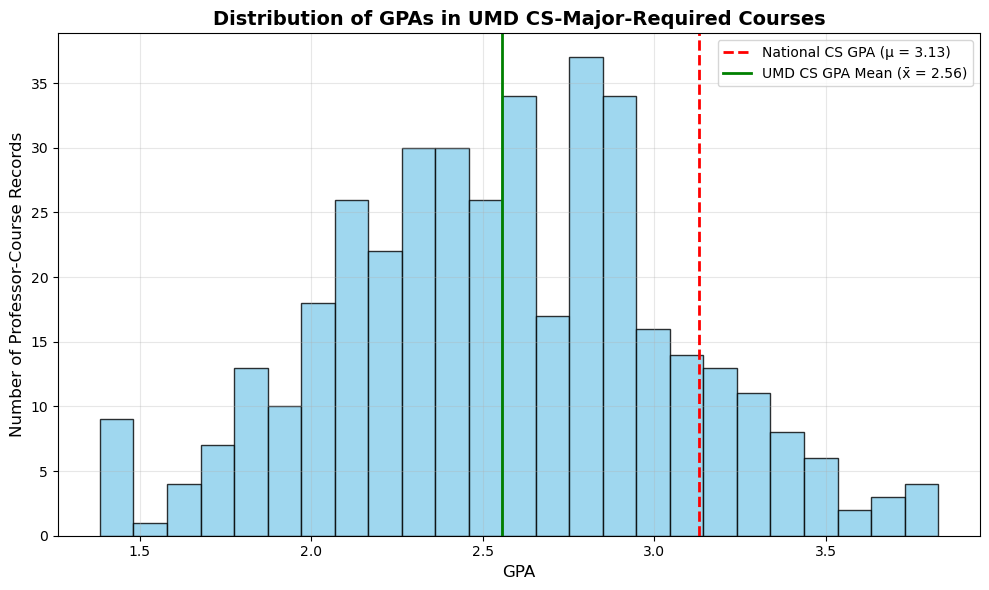

In [8]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(all_gpas, bins=25, color="skyblue", edgecolor="black", alpha=0.8)

# Add vertical lines
plt.axvline(mu_0, color="red", linestyle="--", linewidth=2, label=f"National CS GPA (μ = {mu_0})")
plt.axvline(sample_mean, color="green", linestyle="-", linewidth=2, label=f"UMD CS GPA Mean (x̄ = {sample_mean:.2f})")

# Add labels and title
plt.title("Distribution of GPAs in UMD CS-Major-Required Courses", fontsize=14, fontweight="bold")
plt.xlabel("GPA", fontsize=12)
plt.ylabel("Number of Professor-Course Records", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusions

In this analysis, we aimed to determine whether students enrolled in CS-major-required courses at the University of Maryland (UMD) receive significantly lower grades than the national average GPA for Computer Science majors. To do this, we collected GPA data from PlanetTerp for 24 courses commonly required for CS majors, including CMSC core courses and the most popular upper-level electives, as well as core Math and Statistics courses.

From this dataset, we aggregated 395 unique professor-course GPA records, yielding a sample mean GPA of 2.56. We then conducted a one-sample, two-tailed t-test comparing this sample mean against the most widely cited national CS major GPA average of 3.13.

The test resulted in a t-statistic of -147.5889 and a p-value of ~0 < 0.025 (alpha/2), leading us to reject the null hypothesis. This provides strong statistical evidence that the national average GPA for CS students is not the purported 3.13.

the GPA distribution plot clearly visualizes this gap, with the sample mean (2.56) falling well below the national benchmark (3.13). While this analysis makes the reasonable assumption that most students in these courses are CS majors, it also includes students who may have dropped the major after receiving low grades — suggesting our estimate may represent the broader difficulty of pursuing CS at UMD rather than the GPA of graduates alone.

## Limitations
- Course GPA data includes all students, not just confirmed CS majors

- Withdrawals (W) and retakes may skew GPA data

- Data assumes all professor-course pairings are weighted equally

- The standing statistic found on Google-- that the average CS gpa is 3.13-- takes into account a student's Gen-Eds and non-CS classes, which are usually easier and help raise their GPA. Our sample mean is only CS and math classes, and does not take into account the easier classes that raise GPA. Therefore our sample mean is a signifcant underestimate of the average UMD CS student's whole GPA. This is a byrpoduct of the limited data of the API, which does not provide these wholly encapsulating GPAs per student, but rather just GPAs per courses, which have much more variance. 